# **Inteligência Artificial - IC/UFRJ - 2022/1**
## **Tarefa 6 - Regressão Linear**
### Prof. João Carlos Pereira da Silva
#### Aluno: Roberto Leonie Ferreira Moreira (DRE: 116062192)

## **1. Regressão Linear**

### Item A:

Inicialmente, será refeito o exemplo de **regressão linear** dado de forma a utilizar o modelo de regressão implmentado pelo pacote `scikit.linear_model` da biblioteca `scikit`. Mas antes, precisamos trazer os nossos dados a serem explorados para **treinamento** e **teste** conforme mostrado na célula a seguir. Note que é necessária a anexação do arquivo intitulado *'exemplo.csv'*, que deve estar no mesmo diretório do *notebook*.

           X           Y
0  28.816847   60.854133
1  35.757619   67.590670
2  53.821076  110.762773
3  58.215693  115.785785
4  66.809748  125.311129
5  78.252814  149.003866
6  80.648697  159.619414
7  81.296082  157.985286
8  95.724162  197.179636
9  99.958481  196.907397


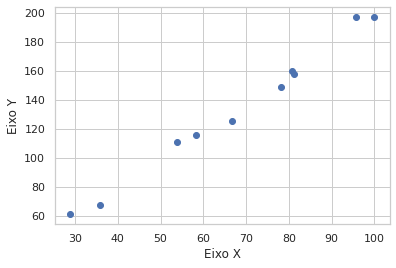

[[28.81684742]
 [35.75761893]
 [53.82107634]
 [58.21569264]
 [66.80974831]
 [78.25281369]
 [80.64869706]
 [81.29608217]
 [95.72416241]
 [99.95848131]]
[[ 60.85413282]
 [ 67.59066954]
 [110.76277271]
 [115.78578459]
 [125.31112852]
 [149.00386554]
 [159.61941373]
 [157.98528569]
 [197.17963609]
 [196.90739698]]


In [ ]:
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)

import matplotlib.pyplot as plt # biblioteca para plotar gráficos
plt.rc("font", size=14)

import seaborn as sns # biblioteca de visualização de dados
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('exemplo.csv',header=0)
print(data)

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X'], data['Y'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

print(X)
print(Y)

Note que acima foram impressas as instâncias do nosso conjunto de dados (*dataset*): o atributo (ou *feature*) **X** e o objetivo **Y**. A partir deste conjunto de dados, **construiremos o nosso modelo de regressão**.

Conforme o nome do método indica, queremos supor uma reta da forma $Y(x) = ax + b$ que melhor se ajusta ao *dataset*. Isto é, uma reta que possua coeficientes que minimizem uma função 

\begin{align}
erro(\theta_0, \theta_1)
\end{align}

de duas variáveis. Desta forma, a nossa reta desejada será a mais justa possível.

In [ ]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(X,Y) # fazendo fit para 100% de treinamento e 0% de teste

# se nenhum erro foi encontrado, o modelo de regressao 
# encontrou a reta de melhor ajuste.

LinearRegression()

Sabemos que a nossa reta desejada tem a cara

\begin{align}
y(x) = \theta_1 x + \theta_0
\end{align} .

O modelo de **regressão linear** do pacote `scikit` nos retornará estes parâmetros *minimizantes* $\theta_0$ e $\theta_1$ através dos seguintes métodos:

In [ ]:
theta0 = regressao.intercept_
theta1 = regressao.coef_

print("Theta 0 encontrado: %f" % theta0)
print("Theta 1 encontrado: %f\n\n" % theta1)

print(f'y(x) = {theta1} x + {theta0}\n')

# print(theta0, theta1)

Theta 0 encontrado: -0.088924
Theta 1 encontrado: 1.975397


y(x) = [[1.9753966]] x + [-0.0889236]



Para entendermos o quão ajustada está a reta obtida, façamos uma plotagem.


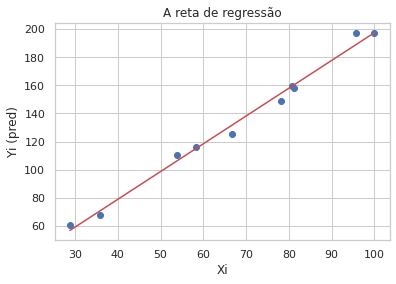

In [ ]:
import matplotlib.pyplot as plt

# a funcao a ser plotada
y_pred = (theta1 * X) + theta0

plt.title("A reta de regressão")
plt.xlabel("Xi")
plt.ylabel("Yi (pred)")
plt.plot(X,y_pred,'r')

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X'], data['Y'],cmap='red')

plt.show()

Agora, gostaríamos de indicar qual o **erro quadrático médio** desta modelagem a partir destes parâmetros obtidos. Inicialmente, vamos importar os pacotes e bibliotecas necessários de `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

# calculando o erro quadratico medio entre
# Y = Y real
# y_pred = Y previsto
eqm_inicial = mean_squared_error(Y, y_pred)
print(eqm_inicial)

19.310387739177333


Nota-se que o valor inicial (19.3103877) do erro quadrático médio está muito elevado para os determinados padrões (entre 0 e 1). Para que este valor seja minimizado, utilizaremos o algoritmo de **Gradiente Descendente**. Para isso, vamos importar o pacote `SGDRegressor` do pacote `sklearn.linear_model`.

In [ ]:
from sklearn.linear_model import SGDRegressor

Para valores da taxa de aprendizado $\alpha = \{0.1, 0.01, 0.001\}$, foram verificados os seguintes valores para os parâmetros de coeficiente ($\theta_1$) e interceptação ($\theta_0$):

In [ ]:
def imprimeParametros(X,Y,learning_rate):
  # eta0 eh a taxa de aprendizado inicial (learning rate)
  sgd_reg = SGDRegressor(max_iter=1000,eta0=learning_rate)
  sgd_reg.fit(X,Y.ravel())

  theta0 = sgd_reg.intercept_
  theta1 = sgd_reg.coef_

  print("Theta 0 encontrado: %f" % theta0)
  print("Theta 1 encontrado: %f\n\n" % theta1)

  return theta0, theta1

In [ ]:
theta0, theta1 = imprimeParametros(X,Y,.1)

Theta 0 encontrado: 17913797225.034328
Theta 1 encontrado: 254013896824.048584




In [ ]:
theta0, theta1 = imprimeParametros(X,Y,.01)

Theta 0 encontrado: -349129736.347074
Theta 1 encontrado: -79505163194.456421




In [ ]:
theta0, theta1 = imprimeParametros(X,Y,.001)

Theta 0 encontrado: 1864.661356
Theta 1 encontrado: 178.249699




In [ ]:
theta0, theta1 = imprimeParametros(X,Y,.0001)

Theta 0 encontrado: 0.025982
Theta 1 encontrado: 1.984816




Repare que somente a partir de $\alpha = 0.0001$ que **os valores dos parâmetros de minimização começam a convergir.**

A partir destes valores de parâmetro, podemos novamente tentar obter o valor do **erro quadrático médio**.

Vamos antes, atualizar o valor da função 

\begin{align}
y(x) = \theta_1 x + \theta_0.
\end{align}

In [ ]:
y_pred = (theta1 * X) + theta0
eqm = mean_squared_error(Y, y_pred)
print(eqm)

19.925312051433647


Vamos agora optar por uma abordagem diferente. Façamos a **divisão** do nosso conjunto de dados em **treinamento** ($70\%$) e **teste** ($30\%$).

In [ ]:
# separando o conjunto de dados em 30% para teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

# construindo o modelo de regressao
regressao = LinearRegression()
regressao.fit(X_train, y_train)

theta0 = regressao.intercept_
theta1 = regressao.coef_

print("Theta 0 encontrado: %f" % theta0)
print("Theta 1 encontrado: %f\n\n" % theta1)

print(f'y(x) = {theta1} x + {theta0}\n')

Theta 0 encontrado: 1.027812
Theta 1 encontrado: 1.942089


y(x) = [[1.94208855]] x + [1.02781151]



Para entendermos o quão ajustada está a reta obtida, façamos uma plotagem.


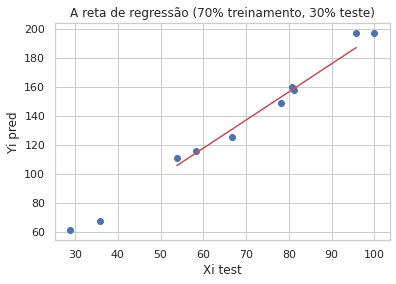

In [ ]:
import matplotlib.pyplot as plt

# a funcao a ser plotada para previsao para TESTE
y_pred = (theta1 * X_test) + theta0

plt.title("A reta de regressão (70% treinamento, 30% teste)")
plt.xlabel("Xi test")
plt.ylabel("Yi pred")
plt.plot(X_test,y_pred,'r')

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X'], data['Y'],cmap='red')

plt.show()

Para encontrar o **erro quadrático médio** para a divisão de **$70\%$ treinamento** e **$30\%$ teste**, temos:

In [ ]:
# calculando o erro quadratico medio entre
# Y = Y real
# y_pred = Y previsto
eqm_inicial = mean_squared_error(y_test, y_pred)
print(eqm_inicial)

49.3749511082166


Verificamos mais uma vez que o erro quadrático médio se encontra **muito elevado.**

Infelizmente, percebemos que o erro quadrático médio se encontra elevado por demais, então provavelmente algum procedimento errado está sendo realizado.

## **2. `multi.csv`**

A base de dados `multi.csv` contém 4 features *X$_1$*, *X$_2$*, *X$_3$* e *X$_4$*, além de um atributom objetivo *X$_5$*.

### Item A: Plotagem de gráficos

Inicialmente, iremos carregar esta base de dados. É importante relembrar que o arquivo deve estar no mesmo diretório do *notebook* atual.

In [ ]:
data = pd.read_csv('multi.csv',header=0)
print(data)

      X1  X2    X3   X4    X5
0   2017  12  2.75  5.3  1464
1   2017  11  2.50  5.3  1394
2   2017  10  2.50  5.3  1357
3   2017   9  2.50  5.3  1293
4   2017   8  2.50  5.4  1256
5   2017   7  2.50  5.6  1254
6   2017   6  2.50  5.5  1234
7   2017   5  2.25  5.5  1195
8   2017   4  2.25  5.5  1159
9   2017   3  2.25  5.6  1167
10  2017   2  2.00  5.7  1130
11  2017   1  2.00  5.9  1075
12  2016  12  2.00  6.0  1047
13  2016  11  1.75  5.9   965
14  2016  10  1.75  5.8   943
15  2016   9  1.75  6.1   958
16  2016   8  1.75  6.2   971
17  2016   7  1.75  6.1   949
18  2016   6  1.75  6.1   884
19  2016   5  1.75  6.1   866
20  2016   4  1.75  5.9   876
21  2016   3  1.75  6.2   822
22  2016   2  1.75  6.2   704
23  2016   1  1.75  6.1   719


Uma vez carregada a base de dados, podemos realizar as seguintes plotagens:

$X_1$ x $X_5$

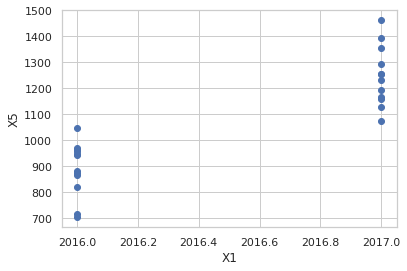

In [ ]:
plt.scatter(data['X1'], data['X5'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("X1")
plt.ylabel("X5")
# plt.savefig('pontos.png')
plt.show()

$X_2$ x $X_5$

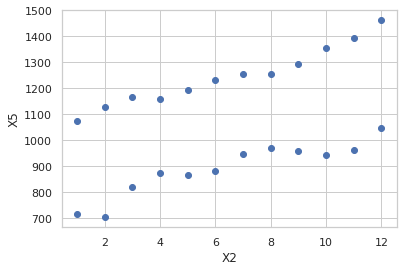

In [ ]:
plt.scatter(data['X2'], data['X5'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("X2")
plt.ylabel("X5")
# plt.savefig('pontos.png')
plt.show()

$X_3$ x $X_5$

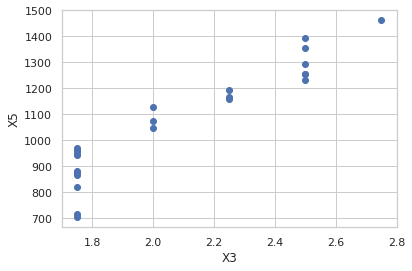

In [ ]:
plt.scatter(data['X3'], data['X5'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("X3")
plt.ylabel("X5")
# plt.savefig('pontos.png')
plt.show()

$X_4$ x $X_5$

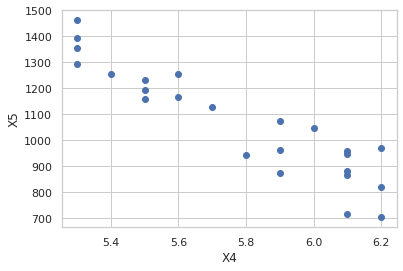

In [ ]:
plt.scatter(data['X4'], data['X5'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("X4")
plt.ylabel("X5")
# plt.savefig('pontos.png')
plt.show()

Observando e analisando as plotagens dos gráficos, percebe-se que $X_4$ é a **feature mais justa** para pensar uma relação linear com o **atributo objetivo** $X_5$.

Através do atributo $X_4$, utilizaremos o modelo de **regressão linear** do `scikit` e do conjunto de dados (aqui, $100\%$ de **treinamento**) para que seja possível determinar **os coeficientes da equação de reta corrspondente**.

In [ ]:
# transformando X4 e X5 para numpy array. Ele precisa ser bidimensional (-1,1)
X4 = data.iloc[:,3].values.reshape(-1, 1) 
X5 = data.iloc[:,4].values.reshape(-1, 1) 

# print(X4)
# print(X5)

regressao = LinearRegression()
regressao.fit(X4,X5) # fazendo fit para 100% de treinamento e 0% de teste

# obtendo os coeficientes da minha reta desejada
theta0 = regressao.intercept_
theta1 = regressao.coef_

print("Theta 0 encontrado: %f" % theta0)
print("Theta 1 encontrado: %f\n\n" % theta1)

print(f'y(x) = {theta1} x + {theta0}\n')

# print(theta0, theta1)

Theta 0 encontrado: 4471.339321
Theta 1 encontrado: -588.962076


y(x) = [[-588.96207585]] x + [4471.33932136]



Note que os valores dos parâmetros encontrados parece um **pouco elevado**. Tentaremos minimizar o **erro quadrático médio** obtido para que encontremos valores de minimização mais justos.

Primeiro, precisamos obter o **EQM** para este exemplo e modelo.

In [ ]:
x5_pred = (theta1 * X4) + theta0

# calculando o erro quadratico medio entre
# X5 = objetivo real
# x5_pred = objetivo previsto
ErroQM = mean_squared_error(X5, x5_pred)
print(ErroQM)

6353.776447105782


Realizando plotagem, temos:

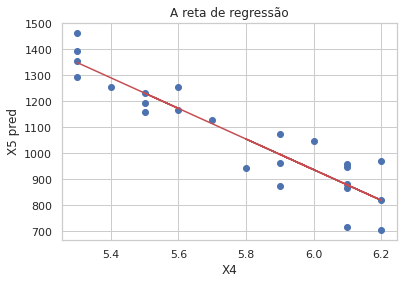

In [ ]:
plt.title("A reta de regressão")
plt.xlabel("X4")
plt.ylabel("X5 pred")
plt.plot(X4,x5_pred,'r')

plt.scatter(data['X4'], data['X5'],cmap='red')

plt.show()

Note que, mais uma vez, o erro quadrático médio se encontra demasiadamente **elevado.** Tentaremos minimizá-lo através do algoritmo de **Gradiente Descedente.**

In [ ]:
theta0, theta1 = imprimeParametros(X4,X5,.1)

Theta 0 encontrado: 180.272622
Theta 1 encontrado: 187.802254




In [ ]:
theta0, theta1 = imprimeParametros(X4,X5,.01)

Theta 0 encontrado: 45.113466
Theta 1 encontrado: 181.602554




In [ ]:
theta0, theta1 = imprimeParametros(X4,X5,.001)

Theta 0 encontrado: 33.228337
Theta 1 encontrado: 176.492387




In [ ]:
theta0, theta1 = imprimeParametros(X4,X5,.0001)

Theta 0 encontrado: 34.119197
Theta 1 encontrado: 177.020892




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Para uma taxa de aprendizado $\alpha = 0.0001$, os valores dos parâmetros encontrados foram

\begin{align}
\theta_0 = 34.124691 \mbox{ e }
\theta_1 = 177.016233 \mbox{.}
\end{align}

Refazendo a equação agora para $y(x) = 177.016233x + 34.124691$, temos os seguintes procedimentos:

In [ ]:
# atualizando a funcao com os novos valores dos parametros
x5_pred = (theta1 * X4) + theta0

# calculando o erro quadratico medio entre
# X5 = objetivo real
# x5_pred = objetivo previsto
ErroQM = mean_squared_error(X5, x5_pred)
print(ErroQM)

67780.53798995927


Repare que o **erro quadrático médio** aumentou e muito, explodiu. Uma catástrofe sem precedentes. Uma pantomima, uma patuscada, um devaneio, um sonho de uma noite de verão.

Brincadeiras à parte, nem sempre o erro quadrático médio irá se reduzir.

### Item C:
Por fim, iremos refazer a previsão através do modelo de regressão linear. Todavia, o nosso *dataset* será dividido em **treinamento** ($75\%$) e **teste** ($25\%$).

In [ ]:
# dividindo o conjunto de dados para 25% de teste
X4_train, X4_test, x5_train, x5_test = train_test_split(X4, X5, test_size = 0.25)

# construindo o modelo de regressao
regressao = LinearRegression()
regressao.fit(X4_train, x5_train)

theta0 = regressao.intercept_
theta1 = regressao.coef_

print("Theta 0 encontrado: %f" % theta0)
print("Theta 1 encontrado: %f\n\n" % theta1)

print(f'y(x) = {theta1} x + {theta0}\n')

Theta 0 encontrado: 4408.386336
Theta 1 encontrado: -577.974607


y(x) = [[-577.97460701]] x + [4408.38633615]



Fazendo uma plotagem para entender a **reta** e o **modelo**, temos:

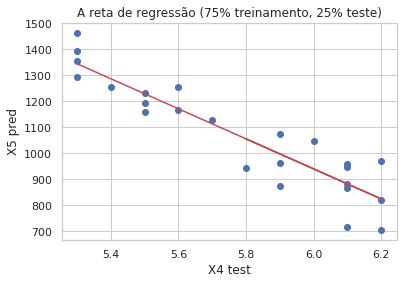

In [ ]:
# a funcao a ser plotada para previsao para TESTE
x5_pred = (theta1 * X4_test) + theta0

plt.title("A reta de regressão (75% treinamento, 25% teste)")
plt.xlabel("X4 test")
plt.ylabel("X5 pred")
plt.plot(X4_test,x5_pred,'r')

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X4'], data['X5'],cmap='red')

plt.show()

Para encontrar o **erro quadrático médio** para a divisão de **$75\%$ treinamento** e **$25\%$ teste**, temos:

In [ ]:
# calculando o erro quadratico medio entre
# X5 = objetivo real
# x5_pred = objetivo previsto
ErroQM = mean_squared_error(x5_test, x5_pred)
print(ErroQM)

3721.133709176453


Verificamos mais uma vez que o erro quadrático médio se encontra **muito elevado.**

Infelizmente, percebemos que o erro quadrático médio se encontra elevado por demais, então provavelmente algum procedimento errado está sendo realizado.

## **Referências:**

1.   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2.   https://scikit-learn.org/stable/modules/linear_model.html
3.   https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
4.   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
5.   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html



